In [3]:
import numpy as np

In [165]:
def combineColumns(*avecs):
    for arg in avecs:
        if (type(arg) is not np.ndarray):
            arg = np.array(arg)
    Amat = np.column_stack(avecs)
    if np.shape(Amat)[0] != np.prod(np.shape(avecs[0])):
        raise Exception('concatenation failed')
    else:
        return Amat
    
def getProjMat(A):
    projMat = A@(np.linalg.inv(A.T@(A)))@(A.T) #A(ATA)-1(AT)
    if np.unique(np.shape(A)).size == 1 & np.allclose(projMat, np.identity(np.shape(A)[0])):
        print('projection matrix is I, A is invertible so full rank, so projection stays in full dimensional space')
    return projMat

def getProj(A,b):
    xbar = (np.linalg.inv(A.T@A)@A.T)@b
    projection = A@xbar 
    return projection, xbar

SyntaxError: invalid syntax (<ipython-input-165-20c887d732d2>, line 20)

### Problem 1

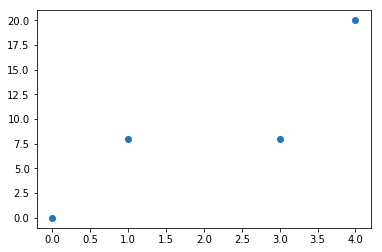

In [8]:
y = [0,8,8,20]
t = [0,1,3,4]

import matplotlib.pyplot as plt 
plt.scatter(t,y)
plt.show()

In [13]:
#C + Dt
#unknowns are D

bias = np.ones(np.size(t))
A = combineColumns(bias,t)

In [81]:
AtA = A.T@A
print(AtA)

Atb = A.T@y #shape of (2,4)*(4,1) = 2,1)
print(Atb)

assert np.shape(Atb)[0] == np.shape(A.T)[0], 'matrix multiplication did not occur correctly'

[[ 4.  8.]
 [ 8. 26.]]
[ 36. 112.]


In [72]:
#get projected points and errors
littlep, xbar = getProj(A,y)

print(xbar) #(1,4), correct

err = y-littlep

print(littlep) # (1,5,13,17), correct
print(err)
assert np.dot(littlep,err)==0, 'err and projection are somehow not orthogonal'

[1. 4.]
[ 1.  5. 13. 17.]
[-1.  3. -5.  3.]


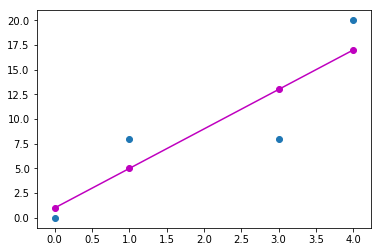

In [55]:
plt.scatter(t,y) #old points
plt.scatter(t, littlep, c = 'm') #new projected points 
plt.plot(t, littlep, 'm') #line joining those points (for viz.)
plt.show()

In [60]:
SSE = np.sum(err**2) 
print(SSE) #E = 44, correct!

44.0


### Problem 2

In [77]:
foo, xbar = getProj(A,littlep)
print(xbar) #xbar is same, exact solution because littlep (by construction) is in column space of A

[1. 4.]


### Problem 3

In [82]:
e = y - littlep
print(e)

eTlittlep = e.T@littlep
print(eTlittlep)
assert eTlittlep==0, 'somehow err is not orth. to projection'

[-1.  3. -5.  3.]
0.0


In [87]:
lenE = np.sqrt(e.T@e)
print(lenE)
assert np.sqrt(SSE) == lenE #sqrt(44)

#SSE is literally eTe, and eTe is len(e)^2, so len(e) is sqrt(SSE)!

6.6332495807108


### Problem 4

In [88]:
#calculus returns the same answer for the combinations of C,D, i.e. the entries of A:
#[4,8;8;26]

### Problem 5

ATA = 4
ATb = 36
SSE: 204.00


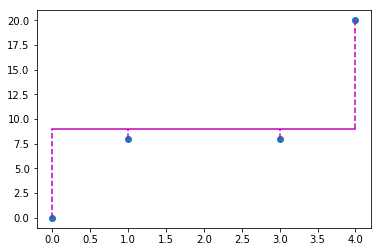

In [242]:
#best *horizontal* line to fit the y's 
c = np.array([1,1,1,1])
A = c; 
y = np.array([0,8,8,20])
t = [0,1,3,4]

print('ATA = %d' % np.int(A.T@A)) #just a scalar: 4
print('ATb = %d' % np.int(A.T@y)) #just a scalar: 4

xbar = (1/(A.T@A))*(A.T@y)

err = y - A*xbar

SSE = np.dot(err,err)
print('SSE: %2.2f' % SSE)

plt.scatter(t, y) 
plt.plot(t, xbar*np.ones(np.size(y)), 'm') 
for pt in range(0, np.shape(y)[0]): 
    plt.plot((t[pt], t[pt]), (y[pt], y[pt]-err[pt]), 'm--') #plot errors, yay!
plt.show()

#best zero-degree approximation (just a constant)

#ahh, the more degree polynomial you allow it, the "closer" it can get to the actual points 

### Problem 6

In [206]:
littlep = A*xbar #(9,9,9,9)
assert np.dot(littlep,err)==0, 'err and projection are somehow not orthogonal'
lenE = np.sqrt(np.dot(err,err)) #correct
assert lenE == np.sqrt(204)

### Problem 7

[0, 1, 3, 4]
[[26]]
[112]
[4.30769231]


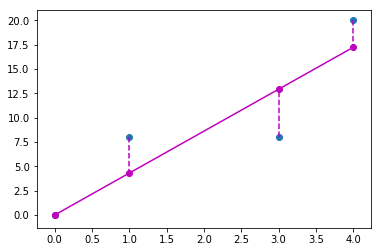

SSE: 45.54


In [274]:
print(t)
A = combineColumns(t) #y is a linear function of t 
print(A.T@A) #226, correct
print(A.T@y) #112, correct
proj,xbar = getProj(A,y)

print(xbar) 
assert np.isclose(xbar, np.int(A.T@y)/np.int(A.T@A)) #remember xbar = AtB/ATA or atb/ata in the 1-d case 

err = y - proj; 

plt.scatter(t,y)
plt.scatter(t,proj, c = 'm')
plt.plot(t,proj, 'm')
for pt in range(0, np.shape(y)[0]): 
    plt.plot((t[pt], t[pt]), (y[pt], y[pt]-err[pt]), 'm--') #plot errors, yay!
plt.show()

#best 1-Degree (?) approximation - y = mx

SSE = np.dot(err,err)
print('SSE: %2.2f' % SSE) #less SSE! yay! (of course)

### Problem 8

In [266]:
#very similar..?


array([4.30769231])

### Problem 9

[ 2.  4. 12. 18.]
[ 36. 112. 400.]


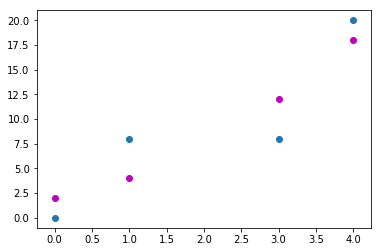

In [282]:
# y = C + Dt + Et^2
bias = [1,1,1,1]
t = np.array([0,1,3,4])
A = combineColumns(bias,t,t**2) #Vandemonde matrix
y = np.array([0,8,8,20])
proj,xbar = getProj(A,y)
print(proj)
print(A.T@A@xbar) #check! 
plt.scatter(t,y)
plt.scatter(t,proj, c='m')
plt.show()

### Problem 10

In [289]:
# y = C + Dt + Et^2 + Ft^3
bias = [1,1,1,1]
t = np.array([0,1,3,4])
A = combineColumns(bias,t,t**2, t**2) #Vandemonde matrix
A #use elimination

array([[ 1,  0,  0,  0],
       [ 1,  1,  1,  1],
       [ 1,  3,  9,  9],
       [ 1,  4, 16, 16]])

### Problem 11

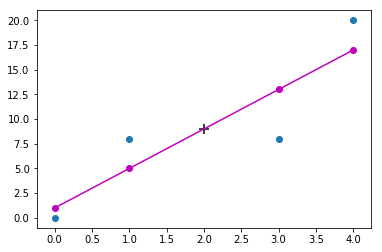

In [311]:
t = np.array([0,1,3,4])
bias = np.ones(np.size(t))
y = np.array([0,8,8,20])
A = combineColumns(bias, t) #y is a linear function of t, that may have a constant bias
proj,xbar = getProj(A,y)

plt.scatter(t,y)
plt.scatter(t,proj, c = 'm')
plt.plot(t,proj, 'm')
plt.scatter(2,9, 100, 'k','+') #average of t's and y's, does indeed lie on the line of best fit 
plt.show()

### Problem 12

In [327]:
err = y - proj
print(err)
print(np.dot(err,err)) #(len^2)/2 = var
print(np.sqrt(np.dot(err,err))) #(len^2)/n = std?

[-1.  3. -5.  3.]
44.0
6.6332495807108


In [348]:
p = np.array([3,3,3])
b = np.array([1,2,6])
e = b-p
print(e)

[-2 -1  3]
